In [8]:
import numpy as np

rng = np.random.default_rng(seed=1701)

In [9]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output


values = rng.integers(1, 10, size=5)
compute_reciprocals(values)

array([0.11111111, 0.25      , 1.        , 0.33333333, 0.125     ])

In [10]:
big_array = rng.integers(1, 100, size=1_000_000)
%timeit compute_reciprocals(big_array)

1.52 s ± 29.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
# numpy uses vectorized operations, which are implemented via ufuncs
print(compute_reciprocals(values))
print(1.0 / values)

[0.11111111 0.25       1.         0.33333333 0.125     ]
[0.11111111 0.25       1.         0.33333333 0.125     ]


In [12]:
%timeit (1.0 / big_array)

2.12 ms ± 8.85 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
# we can operate between two arrays
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [14]:
# ufuncs can also act on multi-dimensional arrays
x = np.arange(9).reshape((3, 3))
2**x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

In [15]:
# computations using vectorized operations are more efficient than using loops
# if there is a for loop in finished code then using a vectorized operation should be explored
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


In [16]:
# there are also negatives and exponents and modulus
print("-x     = ", -x)
print("x ** 2 = ", x**2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In [17]:
# the standard order of operations is followed
-((0.5 * x + 1) ** 2)

array([-1.  , -2.25, -4.  , -6.25])

In [18]:
# all of these are just wrappers for specific functions
np.add(x, 2)

array([2, 3, 4, 5])

In [19]:
# there are also absolute value, trigonometric, and rounding functions
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [20]:
# the nummpy ufunc is np.absolute, which is also available as np.abs
np.abs(x)

array([2, 1, 0, 1, 2])

In [21]:
# ufuncs can also handle complex data in which case it returns the magnitude
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

In [22]:
# there are also trigonometric functions
theta = np.linspace(0, np.pi, 3)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [23]:
# there are also inverse trigonometric functions
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


In [26]:
# there are also exponentials and logarithms
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3.0, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3.  9. 27.]


In [27]:
# there is also a natural logarithm as well as a base 2 and base 10 logarithm
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [28]:
# there are also other versions that are usefull for maining precision with very small input
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


In [29]:
# there are more specialized ufuncs that are useful for specific tasks as well as some in scipy
from scipy import special

In [31]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [32]:
# Error function (integral of Gaussian) its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


Advaced Ufunc Features

In [33]:
# for large calculations, it is sometimes useful to specify an output array
# for all ufuncs this can be done using the out argument of the function
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [34]:
# this can be used with the array views for example we can write the results of a computation to every other element
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)
# if we had instead written y[::2] = 2 ** x then a temporary array would have been created to hold the results of 2 ** x

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


aggregations

In [35]:
# aggregations can be computed directly from the object itself
# if we'd like to reduce an array with a particular operation we can use the reduce method of any ufunc
# for example calling reduce on the add ufunc returns the sum of all elements in the array
x = np.arange(1, 6)
np.add.reduce(x)

15

In [36]:
# similarly calling reduce on the multiply ufunc results in the product of all array elements
np.multiply.reduce(x)

120

In [37]:
# if we'd like to store all the intermediate results of the computation we can instead use accumulate
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [39]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

outer products

In [40]:
# any ufunc can compute the output of all pairs of two different inputs using outer method
# this allows us to easily create a multiplication table
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

Aggregations: min, max, and everything in between

In [41]:
# first step is to compute various summary statistics of the data
rng = np.random.default_rng()

In [43]:
L = rng.random(100)
sum(L)

53.191892432768164

In [45]:
big_array = rng.random(1_000_000)
%timeit sum(big_array)
%timeit np.sum(big_array)
# be careful, sum is not the same as np.sum because sum is a built-in Python function that calls the __add__ method

79.8 ms ± 480 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
435 µs ± 26.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [46]:
# there are min and max functions as well
min(big_array), max(big_array)

(8.470153484152476e-07, 0.9999964525726501)

In [47]:
%timeit min(big_array)
%timeit np.min(big_array)

53.6 ms ± 2.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
383 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [48]:
print(big_array.min(), big_array.max(), big_array.sum())

8.470153484152476e-07 0.9999964525726501 500312.4476665305


In [49]:
# one common type of aggregation operation is an aggregate along a row or column
# say you have some data in a two-dimensional array
M = rng.integers(0, 10, (3, 4))
print(M)
M.sum()
# numpy aggregations will apply across all elements of a multidimensional array

[[3 5 6 1]
 [3 8 3 2]
 [1 1 6 6]]


45

In [50]:
M.min(axis=0)

array([1, 1, 3, 1])

In [51]:
# the function returns four values corresponding to the four columns of numbers
M.max(axis=1)

array([6, 8, 6])

In [52]:
!head -4 Data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [53]:
import pandas as pd

data = pd.read_csv("Data/president_heights.csv")
heights = np.array(data["height(cm)"])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [54]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [55]:
# to give us the quantiles
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_60610/2079592702.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


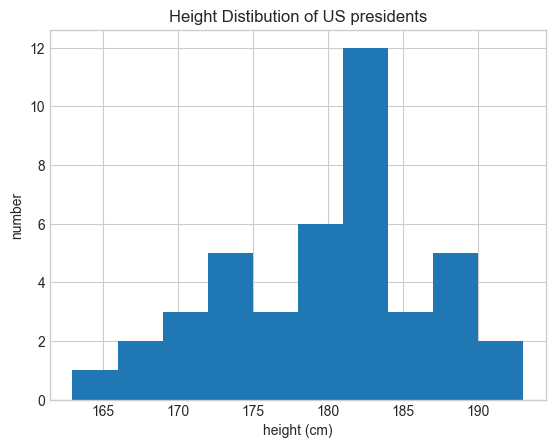

In [57]:
plt.hist(heights)
plt.title("Height Distibution of US presidents")
plt.xlabel("height (cm)")
plt.ylabel("number")

Broadcasting

In [58]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [59]:
a + 5
# this is called broadcasting and is a set of rules for applying binary ufuncs on arrays of different sizes

array([5, 6, 7])

In [60]:
# we can extend this idea to arrays of higher dimensions
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [61]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [62]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


Rules of Broadcasting

In [63]:
# Rule 1: if the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side
# rule 2: if the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape
# rule 3: if in any dimension the sizes disagree and neither is equal to 1, an error is raised

# adding a two-dimensional array to a one-dimensional array
M = np.ones((2, 3))
a = np.arange(3)
# a shape is (3,) and M shape is (2, 3)
# a becomes 1x3 by rule 1
# a becomes 2x3 by rule 2 so the final shape is (2, 3)

In [64]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [65]:
# if both arrays have to be broadcast
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
# a shape is (3, 1) and b shape is (3,)
# b becomes (1, 3) by rule 1
# b becomes (3, 3) by rule 2 so the final shape is (3, 3)
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [66]:
# when two arrays are not compatible for broadcasting an error is raised
M = np.ones((3, 2))
a = np.arange(3)
# M shape is (3, 2) and a shape is (3,)
# a becomes (1, 3) by rule 1
# a streatches to match M by rule 2 but this results in an error because the final shapes are (3, 3) and (3, 2)
# the shapes do not math in any dimension so an error is raised
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [67]:
# if you want to pad on the right side of the shape you can explicitly broadcast
a[:, np.newaxis].shape

(3, 1)

In [68]:
M + a[:, np.newaxis]
# broadcasting rules apply to any binary ufunc

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [69]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

Centering an array

In [70]:
# subtracting the row-wise mean from an array of data is a common need
rng = np.random.default_rng(seed=1701)
X = rng.random((10, 3))
# we can compute the mean of each feature using the mean aggregate across the first dimension'
Xmean = X.mean(0)
Xmean

array([0.38503638, 0.36991443, 0.63896043])

In [71]:
# we can now center the X array by subtracting the mean
X_centered = X - Xmean
# to double check we can check that the centered array has near zero mean
X_centered.mean(0)

array([ 4.99600361e-17, -4.44089210e-17,  0.00000000e+00])

Plotting a two-dimensional function

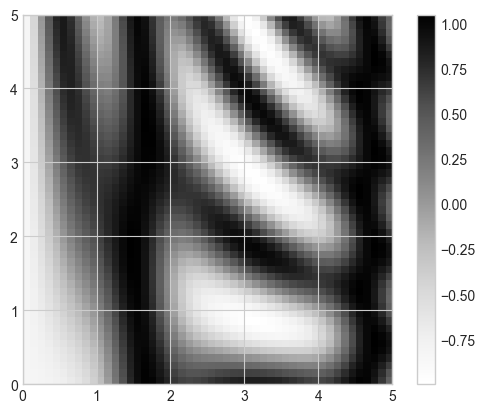

In [74]:
# broadcasting comes in handy when displaying images based on two-dimensional functions. if we want to define a function z = f(x, y) broadcasting can be used to compute the function across the grid
# x and y have 50 steps from 0 - 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

plt.imshow(z, origin="lower", extent=[0, 5, 0, 5])
plt.colorbar()